pspspsspncb

In [ ]:
# importing prerequisite libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as pl

we are going to uploadour dataset from a local directory

this dataset can be found in www.kaggle/datasets

In [68]:
#uploading dataset from a local folder
df = pd.read_csv(r'../tochora/dd/datasets/StudentsPerformance.csv')
#reading contents in the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [69]:
#dataset shape
df.shape

(1000, 8)

this dataset has  1000 rows and 8 columns

checking missing values

In [70]:
#looking for null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

our dataset is clean since it does not contain any null values.

In [71]:
#statistics
df.describe().style.background_gradient('magma')

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.089000,69.169000,68.054000
std,15.163080,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


Data visualisation

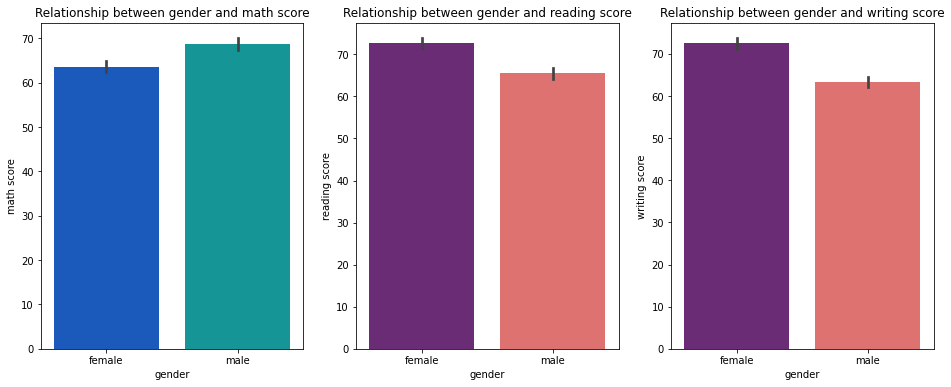

In [72]:
#fig, axes = plt.figure(figsize=(16, 6))
fig, axes = plt.subplots(1,3, figsize=(16, 6))
sns.barplot(x=df['gender'], y=df['math score'], palette='winter', ax=axes[0]).set(title="Relationship between gender and math score")
sns.barplot(x=df['gender'], y=df['reading score'], palette='magma', ax=axes[1]).set(title="Relationship between gender and reading score")
sns.barplot(x=df['gender'], y=df['writing score'], palette='magma', ax=axes[2]).set(title="Relationship between gender and writing score")
plt.show()



from above plots it shows that:

figure 1: male bar is bigger compared to females showing that males perform better at maths compared to females.

figure2: Female have a higher bar compared to males showing that they excel at reading comapred to males.

figure3 : the bar noted female is bigger compared to males depicting that they perform better in wriring compared to males.

In [73]:
# entries and their frequency in the parent level of education column
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

in this column, we have 2 columns that are represent the same thing that is high school and some high school.we are goin to aggregate them into one

In [74]:
df.replace('some high school', 'high school', inplace=True)

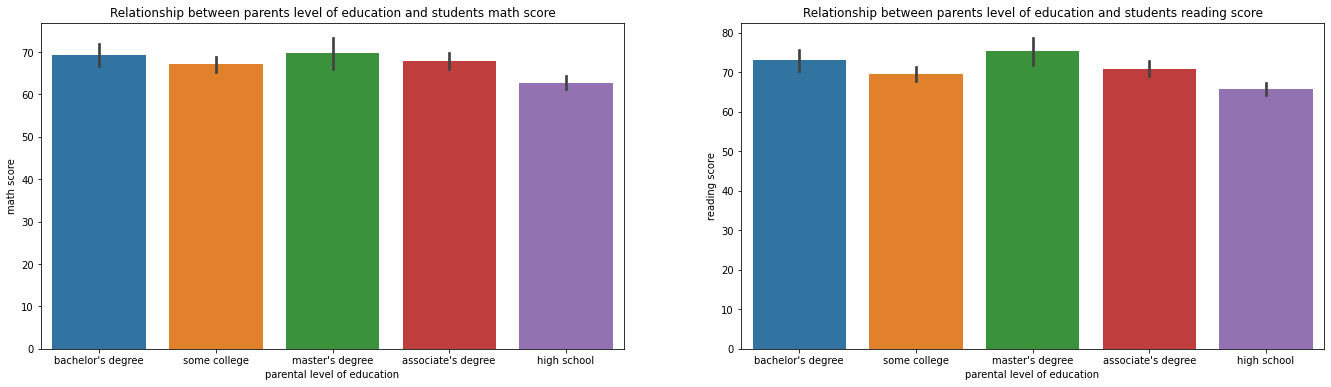

In [75]:
plt.figure(figsize=(23,6))
plt.subplot(121)
sns.barplot(x=df['parental level of education'], y=df['math score'],)
plt.title('Relationship between parents level of education and students math score')
plt.subplot(122)
sns.barplot(x=df['parental level of education'], y=df['reading score'])
plt.title('Relationship between parents level of education and students reading score')
plt.show()

from above plots:

figure 1: it shows that parents that had masters and bachelor degrees have the highest bars, follwed by associate degree with high school having the smallest bar. This shows that students whose parents had masters or bachelor degrees performed well in maths compared to ther students.

figure2: it shows that parents with masters and bachelor degrees have the highest bar while those only reached highschool had the smallest bar in the group.This shows that students whose parents had masters or bachelor degrees excelled in reading compared to other students while those whose parents only attained high school education performed poorly in the group.

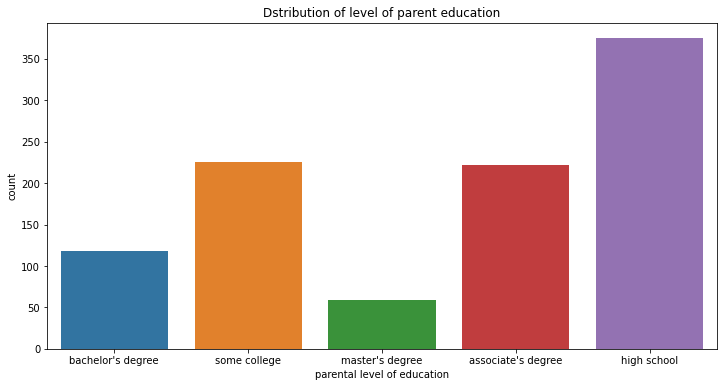

In [76]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['parental level of education'])
plt.title("Dstribution of level of parent education")
plt.show()

from the plot above, High school has the highest bar, followed by some college while masters degree has the smallest bar.

consclusion: Parents who had only attained high school education were the most, followed by those who had attended college, associate degree while parents who has master degree we the least in the group.

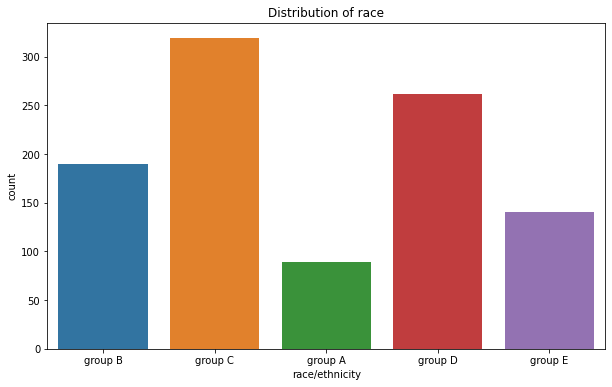

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['race/ethnicity'])
plt.title("Distribution of race")
plt.show()

Group C have the highest bar, follwed by group D while group A had the lowest bar.this shows that Group C race had the highest number of people, follwed by group D while group A had the least number of people in the school.

Text(0.5, 1.0, 'Distribution of test preparation course')

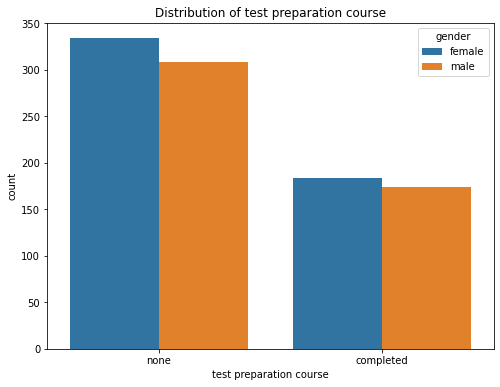

In [78]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df["test preparation course"], hue=df['gender'])
plt.title("Distribution of test preparation course")

Students who did not complete the tests were more compared to those who completed as shown by the bars above.

Correlation

correlation refers to linear relationship between two variables where one variable might be directly on indirectly related to one another at either equal or uneaqual proportion. Correlation can either be negative or positive correlated depending on the sighn of the index. Negative sign = negative correlation and positive sighn = positive correlation.

correlation index of 0 to 0.25 is considered weak correlation, 2.5 to 7.5 is considered fairly correlated while 7.5 to 1 shows that the values are highly 
correlated

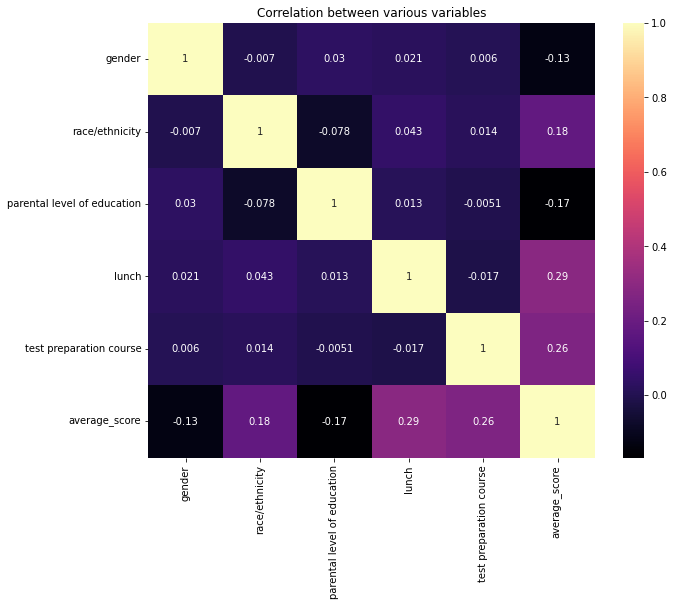

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='magma')
plt.title("Correlation between various variables")
plt.show()

lunch has a value of 29% in relation to average score, followed by test preparation course with 26%. this shows that there is fair correlation between lunch, test perparation course and average score. The rest have either weak negative or positive correlation among them.

Outlier Analysis

Text(0.5, 1.0, 'Outlier detection in math score')

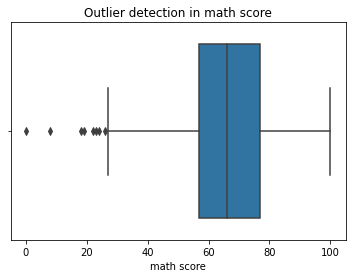

In [80]:
sns.boxplot(x=df['math score'])
plt.title("Outlier detection in math score")

the figure above shows that there are few outliers thus they is no need of removing them to avoid overfitting.

Text(0.5, 1.0, 'Outlier detection in reading score')

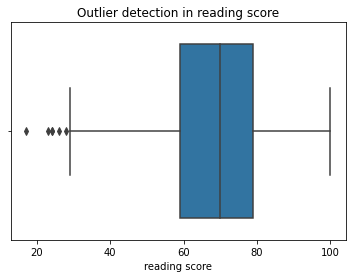

In [81]:
sns.boxplot(x=df['reading score'])
plt.title("Outlier detection in reading score")

In [ ]:
#checking datatypes
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

here we are going to create a new column by aggregating scores of the three subjects and finding their mean.

In [ ]:
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score'])/3



In [ ]:
# rounding off values in average scores into 2 decimal places
df['average_score'] = df['average_score'].round(2)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


we are going to drop 3 columns that is math score, reading score and writing score sinec we dont need them anymore as they are represented by average score.

In [ ]:
# dropping unnecessary columns
df.drop(columns=['math score', 'reading score', 'writing score'], axis=1, inplace=True)

Dummy variables

there are columns that have values that are qualitative in nature.we need to convert them into dummy variables in order to facilitate their use in the model.

In [ ]:
# dummy variables
df['gender'] = df['gender'].apply({"female":0, "male": 1}.get)
df['parental level of education'] = df['parental level of education'].apply({"bachelor's degree": 0, "some college": 1, "master's degree":2, "associate's degree":3, 'high school': 4}.get)
df['race/ethnicity'] = df['race/ethnicity'].apply({"group A":0, "group B": 1, "group C": 3, "group D": 4, "group E": 5}.get)
df['test preparation course'] = df['test preparation course'].apply({"none": 0, 'completed': 1}.get)
df['lunch'] = df['lunch'].apply({"free/reduced":0, 'standard':1}.get)


In [ ]:
#df['gender'] = pd.Categorical(df['gender']).codes
#df['parental level of education'] = pd.Categorical(df['parental level of education']).codes
#df['lunch'] = pd.Categorical(df['lunch']).codes
#df['test preparation course'] = pd.Categorical(df['test preparation course']).codes
#df['race/ethnicity'] = pd.Categorical(df['race/ethnicity']).codes
#df.head()

here we are going to split our data into x and y variables in order to feed them in our model.

In [ ]:
# splitting our data into x and y variables
x = df.drop("test preparation course", axis=1)
y = df['test preparation course']

In [ ]:
#further splitting x and y variables into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=49)

feature scaling

here we are going to normalize our data using StandrdScaler whichs normalizes feature by using this formulae

x` = x – mean(x)/sqrt(var(x)) whic means it  substarcts a mean of a feature x from x and divides it by the squareroot of the variance of feature x.The resulting features have values between 0 and 1.

In [ ]:
# preprocessing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# modelling
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
#fitting our model
lr.fit(x_train,y_train)
score = lr.score(x_test, y_test)
print(score)

0.705


In [ ]:
# making predictions
pred = lr.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       166
           1       0.29      0.50      0.37        34

    accuracy                           0.70       200
   macro avg       0.58      0.62      0.59       200
weighted avg       0.78      0.70      0.73       200



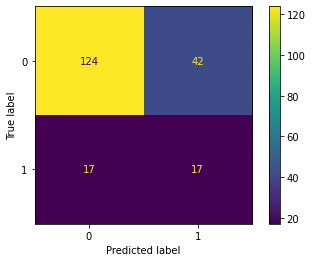

In [ ]:
# a display of the resultant matrix from the model
cm = confusion_matrix(pred, y_test, labels=lr.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
display.plot()